In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random as rd

In [6]:
#Clase que genera diferentes tipos de ruidos
class GenerateNoise:
    def __init__(self):
        print("Todo salio bien")

    # Método que genera a una imagen un ruido de sal y pimienta por medio de un porcentaje
    def impulsive_noise(self, path_img=None, noise_percentage=0):
        if path_img is None or noise_percentage == 0:
            print("Metiste mal los valores!")

        else:
            image = cv.imread(path_img)
            self.size_img = image.shape[0]*image.shape[1]
            self.noise_percentage_to_use = (noise_percentage*self.size_img)/200

            if image.shape[2] > 1:
                self.pepper = [0, 0, 0]
                self.salt = [255, 255, 255]
            elif image.shape[2] == 1:
                self.pepper = 0
                self.salt = 255

            # pixeles blancos
            for x in range(int(self.noise_percentage_to_use)):
                position_x = rd.randrange(2, image.shape[0]-2)
                position_y = rd.randrange(2, image.shape[1]-2)

                image[position_x][position_y] = self.salt

            # pixeles negros
            for x in range(int(self.noise_percentage_to_use)):

                position_x = rd.randrange(2, image.shape[0]-2)
                position_y = rd.randrange(2, image.shape[1]-2)

                image[position_x][position_y] = self.pepper

            return image

            


Todo salio bien
13107


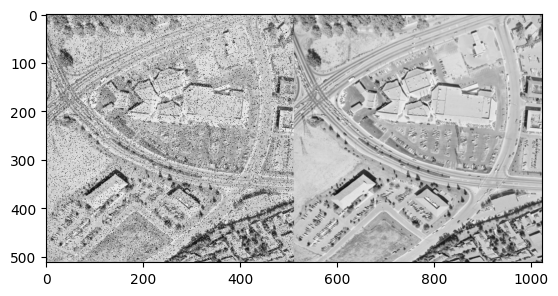

In [14]:
image = GenerateNoise().impulsive_noise("Imagenes Originales Gris/Aerial_gray.png", 10)
image_1 = cv.imread("Imagenes Originales Gris/Aerial_gray.png")
final_frame = cv.hconcat((image, image_1))
plt.imshow(final_frame)

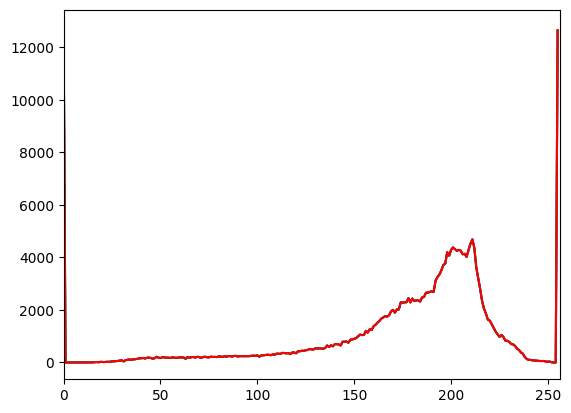

In [15]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

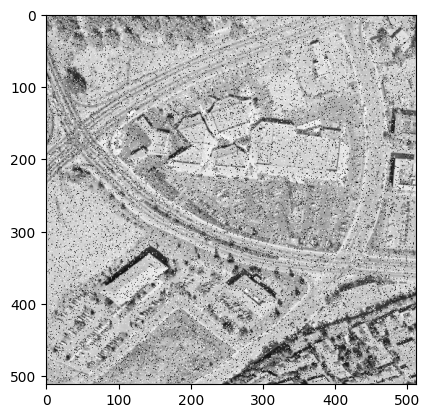

In [25]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [11]:
image[0][9] = [0, 0, 0]

In [18]:
image.shape[2]

3

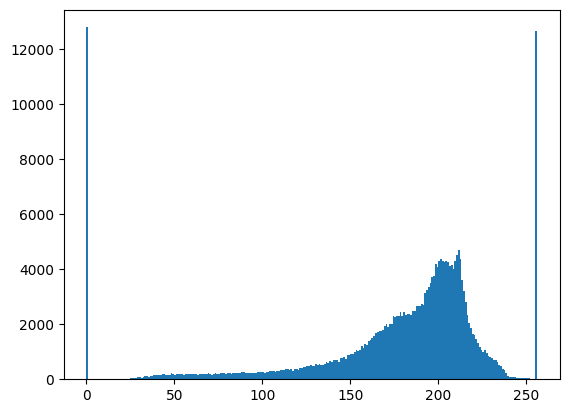

In [26]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()